### This is to get an intuitive feel for the loguniform that is recommended for some parameter tuning with Hyperopt
### It comes from this article: https://medium.com/vooban-ai/hyperopt-tutorial-for-optimizing-neural-networks-hyperparameters-e3102814b919

In [3]:
from hyperopt import hp, pyll
from matplotlib import pyplot as plt
import numpy as np
from scipy.stats.kde import gaussian_kde

In [4]:
%matplotlib inline

#### Define hyperparameter space

In [5]:
hyperparam_generators = {
    'alpha': hp.loguniform('alpha', low=-4.6, high=2.35),
    'l1_ratio' : hp.uniform('l1_ratio', low=0.01, high=1.0),
}

#### Draw samples from space and plot samples to get a feel of the defined space

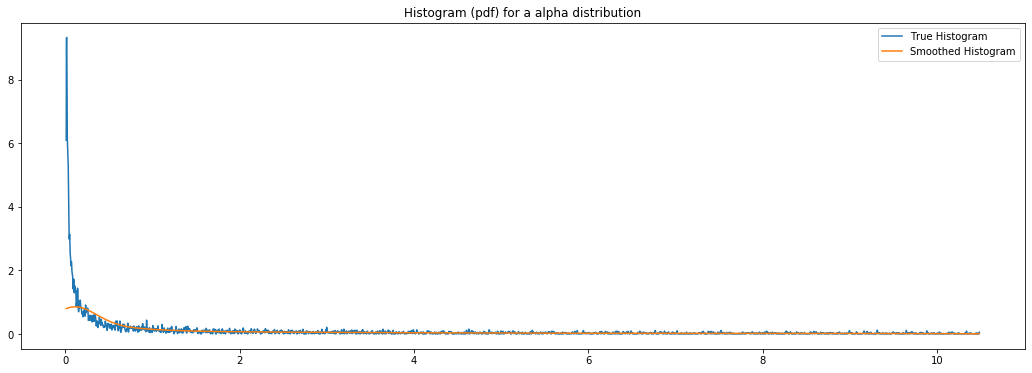

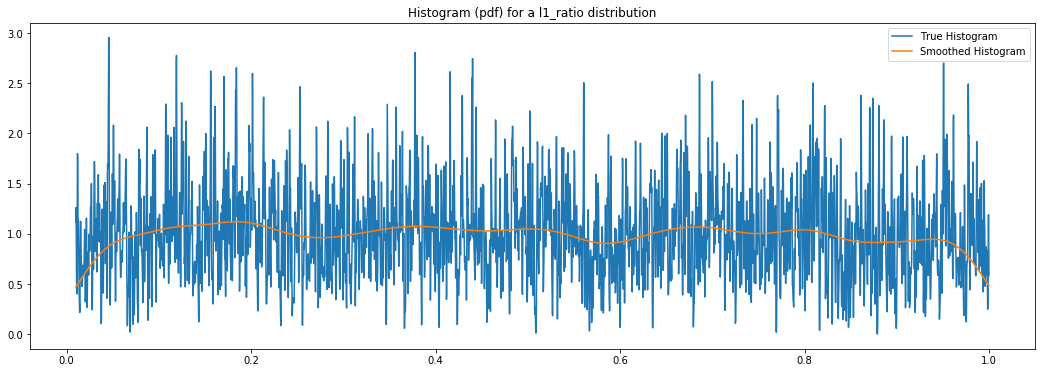

In [6]:
n_samples = 5000

for title, space in hyperparam_generators.items():
    evaluated = [
        pyll.stochastic.sample(space) for _ in range(n_samples)
    ]
    x_domain = np.linspace(min(evaluated), max(evaluated), n_samples)
    
    plt.figure(figsize=(18,6))

    hist = gaussian_kde(evaluated, 0.001)
    plt.plot(x_domain, hist(x_domain), label="True Histogram")

    blurred_hist = gaussian_kde(evaluated, 0.1)
    plt.plot(x_domain, blurred_hist(x_domain), label="Smoothed Histogram")

    plt.title("Histogram (pdf) for a {} distribution".format(title))
    plt.legend()
    plt.show()

### Or you can just check the range with simply taking the exponent of the log uniform space values

In [36]:
np.exp(2.35)

10.485569724727576

In [47]:
np.exp(-4.5)

0.011108996538242306